In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(10,6)})

c:\Users\Vince\anaconda3\envs\wise_group_galaxy_pred\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
losses = torch.load('models/model_21-01-2024-23-21-56_losses.pt')
print(losses)

[362163843.4329502, 330537934.9578544, 583022474.2988505, 578275300.5363984, 407476710.4980843, 650959146.1762452, 384917374.52873564, 566272023.5402299, 324287616.4904215, 510537963.40229887, 310801253.51724136, 393214952.45977014, 387244624.42911875, 461674346.9118774, 590957187.4329501, 547284576.1226053, 375648432.55172414, 428113606.1302682, 338706282.9118774, 391623193.5019157, 455664259.4329502, 466799604.22988504, 368530630.1302682, 326431651.8007663, 615105398.6819923, 382473553.4099617, 520116914.51341, 510092770.57471263, 450243446.68199235, 356691261.79310346, 451833432.2758621, 394998603.5249042, 367457048.5210728, 379201724.3218391, 328418639.44827586, 339325106.51341, 653775538.51341, 385926493.1800766, 496668420.90421456, 338466168.6436782, 365217085.79310346, 279358543.44827586, 446683426.3295019, 384982282.789272, 562378712.7662835, 443104197.14942527, 378986417.532567, 570529383.9693487, 405098582.31417626, 331558358.8045977, 404289539.9233717, 335046748.1992337, 344

Text(0, 0.5, 'Loss (Average MSE)')

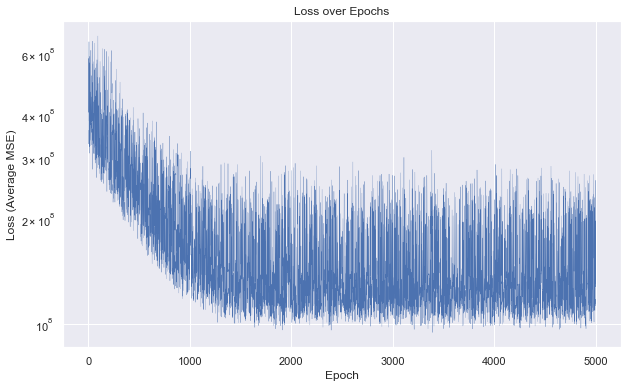

In [39]:
ax = sns.lineplot(losses, linewidth=.25)
ax.set_title('Loss over Epochs')
ax.set_xlabel('Epoch')
ax.set_yscale('log')
ax.set_ylabel('Loss (Average MSE)')


# Model Performance Visualizations

In [12]:
# Setup Model
from model import GCN

model = GCN()
model.state_dict = torch.load('models/model_21-01-2024-23-21-56.pt')
model.eval()


GCN(
  (relu): ReLU()
  (conv1): GCNConv(2, 32)
  (conv2): GCNConv(32, 128)
  (conv3): GCNConv(128, 128)
  (conv4): GCNConv(128, 128)
  (conv5): GCNConv(128, 128)
  (lin): Linear(in_features=128, out_features=1, bias=True)
  (leaky): LeakyReLU(negative_slope=0.01)
)

In [13]:
data = torch.load("datasets/SG256_From_Enzo_Cleaned_SM_Only_Train.pt")

y_truth = np.array([])
y_pred = np.array([])
for graph in data:
    # Feature Selection (should do this better...)
    graph.x = torch.tensor([[data[0], data[1]] for data in graph.x])
    
    for item in graph.y:
        y_truth = np.append(y_truth, item)

    out = model(graph)
    for item in out.tolist():
        y_pred = np.append(y_pred, item[0])

print(len(y_pred), len(y_truth))
print(y_pred, y_truth)


10985 10985
[3416.83007812 2599.56835938 1866.95983887 ... 4497.73388672 6239.45068359
  451.12948608] [3350.70678711  506.71243286  506.71243286 ...  589.0291748   589.0291748
  664.12841797]


10985 10985


Text(0, 0.5, 'Predicted Stellar Mass (MSun)')

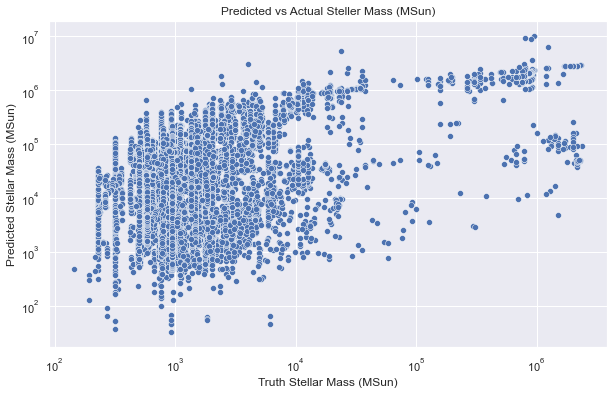

In [14]:
ax = sns.scatterplot(x=y_truth, y=y_pred)
print(len(y_truth), len(y_pred))
ax.set_title('Predicted vs Actual Steller Mass (MSun)')
ax.set_xscale('log')
ax.set_xlabel('Truth Stellar Mass (MSun)')
ax.set_yscale('log')
ax.set_ylabel('Predicted Stellar Mass (MSun)')

Text(0.5, 0, 'Truth Stellar Mass (MSun)')

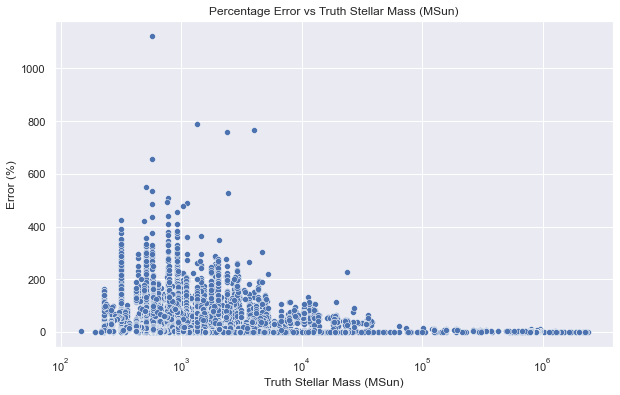

In [33]:
error = (y_pred - y_truth) / y_truth
ax = sns.scatterplot(x=y_truth, y=error)
ax.set_xscale('log')
ax.set_title('Percentage Error vs Truth Stellar Mass (MSun)')
ax.set_ylabel('Error (%)')
ax.set_xlabel('Truth Stellar Mass (MSun)')